In [11]:
import os
import pandas as pd  # Import pandas for table representation

# Define the subfolders
subfolders = ['parallel_mpi/logs'
              #, 'parallel_openmpi/logs', 'serial_mpi/logs'
              ]

# Initialize a dictionary to store logs from each folder
logs = {}

# Initialize a list to store extracted data
extracted_data = []

# Iterate through each subfolder and read log files
for folder in subfolders:
    logs[folder] = []
    for root, _, files in os.walk(folder):
        for file in files:
            if file.endswith('output.log'):  # Check if the file is a log file
                file_path = os.path.join(root, file)
                
                with open(file_path, 'r') as f:
                    log_content = f.read()  # Read the entire content of the log file
                    logs[folder].append(log_content)
                
                # Extract matrix size and core number from the file name
                tokens = file.split('_')
                if len(tokens) >= 5:
                    matrix_size = tokens[3]  # Fourth part is matrix size
                    core_number = tokens[4]  # Fifth part is core number
                    extracted_data.append({
                        'Folder': folder,
                        'Log File': file,
                        'Matrix Size': matrix_size,
                        'Core Number': core_number,
                        'Log': log_content  # Add the log content as the last column
                    })

# Convert the extracted data into a DataFrame
extracted_data_df_mpi = pd.DataFrame(extracted_data)

# Display the DataFrame
extracted_data_df_mpi.sort_values(by=['Matrix Size', 'Core Number'], inplace=True)
extracted_data_df_mpi

,Folder,Log File,Matrix Size,Core Number,Log
1,parallel_mpi/logs,matmul_parallel_mpi_1024_1_output.log,1024,1,MPI 1024x1024 matrix multiplication took 3.302...
0,parallel_mpi/logs,matmul_parallel_mpi_1024_16_output.log,1024,16,MPI 1024x1024 matrix multiplication took 0.338...
2,parallel_mpi/logs,matmul_parallel_mpi_1024_2_output.log,1024,2,MPI 1024x1024 matrix multiplication took 1.749...
3,parallel_mpi/logs,matmul_parallel_mpi_1024_32_output.log,1024,32,MPI 1024x1024 matrix multiplication took 0.555...
4,parallel_mpi/logs,matmul_parallel_mpi_1024_4_output.log,1024,4,MPI 1024x1024 matrix multiplication took 0.872...
5,parallel_mpi/logs,matmul_parallel_mpi_1024_8_output.log,1024,8,MPI 1024x1024 matrix multiplication took 1.054...
7,parallel_mpi/logs,matmul_parallel_mpi_16384_1_output.log,16384,1,
6,parallel_mpi/logs,matmul_parallel_mpi_16384_16_output.log,16384,16,\n============================================...
8,parallel_mpi/logs,matmul_parallel_mpi_16384_2_output.log,16384,2,
9,parallel_mpi/logs,matmul_parallel_mpi_16384_32_output.log,16384,32,\n============================================...


In [8]:
import os
import pandas as pd  # Import pandas for table representation

# Define the subfolders
subfolders = [#'parallel_mpi/logs'
              'parallel_openmpi/logs' 
              #'serial_mpi/logs'
              ]

# Initialize a dictionary to store logs from each folder
logs = {}

# Initialize a list to store extracted data
extracted_data = []

# Iterate through each subfolder and read log files
for folder in subfolders:
    logs[folder] = []
    for root, _, files in os.walk(folder):
        for file in files:
            if file.endswith('output.log'):  # Check if the file is a log file
                file_path = os.path.join(root, file)
                
                with open(file_path, 'r') as f:
                    log_content = f.read()  # Read the entire content of the log file
                    logs[folder].append(log_content)
                
                # Extract matrix size and core number from the file name
                tokens = file.split('_')
                if len(tokens) >= 5:
                    matrix_size = tokens[2]  # Fourth part is matrix size
                    core_number = tokens[3]  # Fifth part is core number
                    extracted_data.append({
                        'Folder': folder,
                        'Log File': file,
                        'Matrix Size': matrix_size,
                        'Core Number': core_number,
                        'Log': log_content  # Add the log content as the last column
                    })

# Convert the extracted data into a DataFrame
extracted_data_df_openmpi = pd.DataFrame(extracted_data)

# Display the DataFrame
extracted_data_df_openmpi

,Folder,Log File,Matrix Size,Core Number,Log
0,parallel_openmpi/logs,matmul_openmpi_1024_16_output.log,1024,16,OpenMP outer‐product matmul: N = 1024 (allocat...
1,parallel_openmpi/logs,matmul_openmpi_1024_2_output.log,1024,2,OpenMP outer‐product matmul: N = 1024 (allocat...
2,parallel_openmpi/logs,matmul_openmpi_1024_32_output.log,1024,32,OpenMP outer‐product matmul: N = 1024 (allocat...
3,parallel_openmpi/logs,matmul_openmpi_1024_4_output.log,1024,4,OpenMP outer‐product matmul: N = 1024 (allocat...
4,parallel_openmpi/logs,matmul_openmpi_1024_8_output.log,1024,8,OpenMP outer‐product matmul: N = 1024 (allocat...
5,parallel_openmpi/logs,matmul_openmpi_16384_16_output.log,16384,16,
6,parallel_openmpi/logs,matmul_openmpi_16384_2_output.log,16384,2,
7,parallel_openmpi/logs,matmul_openmpi_16384_32_output.log,16384,32,
8,parallel_openmpi/logs,matmul_openmpi_16384_4_output.log,16384,4,
9,parallel_openmpi/logs,matmul_openmpi_16384_8_output.log,16384,8,


In [14]:
import os
import pandas as pd  # Import pandas for table representation

# Define the subfolders
subfolders = [#'parallel_mpi/logs'
              #'parallel_openmpi/logs' 
              'serial_mpi/logs'
              ]

# Initialize a dictionary to store logs from each folder
logs = {}

# Initialize a list to store extracted data
extracted_data = []

# Iterate through each subfolder and read log files
for folder in subfolders:
    logs[folder] = []
    for root, _, files in os.walk(folder):
        for file in files:
            if file.endswith('output.log'):  # Check if the file is a log file
                file_path = os.path.join(root, file)
                
                with open(file_path, 'r') as f:
                    log_content = f.read()  # Read the entire content of the log file
                    logs[folder].append(log_content)
                
                # Extract matrix size and core number from the file name
                tokens = file.split('_')
                if len(tokens) >= 5:
                    matrix_size = tokens[2]  # Fourth part is matrix size
                    core_number = tokens[3]  # Fifth part is core number
                    extracted_data.append({
                        'Folder': folder,
                        'Log File': file,
                        'Matrix Size': matrix_size,
                        'Core Number': core_number,
                        'Log': log_content  # Add the log content as the last column
                    })

# Convert the extracted data into a DataFrame
extracted_data_df_serial = pd.DataFrame(extracted_data)

# Display the DataFrame
extracted_data_df_serial

,Folder,Log File,Matrix Size,Core Number,Log
0,serial_mpi/logs,matmul_serial_1024_1_output.log,1024,1,Serial matmul (outer): N = 1000 (allocating ~0...
1,serial_mpi/logs,matmul_serial_16384_1_output.log,16384,1,
2,serial_mpi/logs,matmul_serial_2048_1_output.log,2048,1,Serial matmul (outer): N = 2048 (allocating ~0...
3,serial_mpi/logs,matmul_serial_4096_1_output.log,4096,1,Serial matmul (outer): N = 4096 (allocating ~0...
4,serial_mpi/logs,matmul_serial_8192_1_output.log,8192,1,Serial matmul (outer): N = 8192 (allocating ~1...


In [15]:
extracted_data_df= pd.concat([extracted_data_df_mpi, extracted_data_df_openmpi, extracted_data_df_serial], ignore_index=True)
# Display the combined DataFrame
extracted_data_df

,Folder,Log File,Matrix Size,Core Number,Log
0,parallel_mpi/logs,matmul_parallel_mpi_1024_1_output.log,1024,1,MPI 1024x1024 matrix multiplication took 3.302...
1,parallel_mpi/logs,matmul_parallel_mpi_1024_16_output.log,1024,16,MPI 1024x1024 matrix multiplication took 0.338...
2,parallel_mpi/logs,matmul_parallel_mpi_1024_2_output.log,1024,2,MPI 1024x1024 matrix multiplication took 1.749...
3,parallel_mpi/logs,matmul_parallel_mpi_1024_32_output.log,1024,32,MPI 1024x1024 matrix multiplication took 0.555...
4,parallel_mpi/logs,matmul_parallel_mpi_1024_4_output.log,1024,4,MPI 1024x1024 matrix multiplication took 0.872...
...,...,...,...,...,...
58,serial_mpi/logs,matmul_serial_1024_1_output.log,1024,1,Serial matmul (outer): N = 1000 (allocating ~0...
59,serial_mpi/logs,matmul_serial_16384_1_output.log,16384,1,
60,serial_mpi/logs,matmul_serial_2048_1_output.log,2048,1,Serial matmul (outer): N = 2048 (allocating ~0...
61,serial_mpi/logs,matmul_serial_4096_1_output.log,4096,1,Serial matmul (outer): N = 4096 (allocating ~0...


In [17]:
import re

# Extract seconds from the Log column
extracted_data_df['Seconds'] = extracted_data_df['Log'].apply(lambda log: float(re.search(r'took ([\d.]+) seconds', log).group(1)) if re.search(r'took ([\d.]+) seconds', log) else None)

# Display the updated DataFrame
extracted_data_df.sort_values(by=["Folder",'Matrix Size', 'Core Number'], inplace=True)
extracted_data_df

,Folder,Log File,Matrix Size,Core Number,Log,Seconds
0,parallel_mpi/logs,matmul_parallel_mpi_1024_1_output.log,1024,1,MPI 1024x1024 matrix multiplication took 3.302...,3.302270
1,parallel_mpi/logs,matmul_parallel_mpi_1024_16_output.log,1024,16,MPI 1024x1024 matrix multiplication took 0.338...,0.338842
2,parallel_mpi/logs,matmul_parallel_mpi_1024_2_output.log,1024,2,MPI 1024x1024 matrix multiplication took 1.749...,1.749870
3,parallel_mpi/logs,matmul_parallel_mpi_1024_32_output.log,1024,32,MPI 1024x1024 matrix multiplication took 0.555...,0.555122
4,parallel_mpi/logs,matmul_parallel_mpi_1024_4_output.log,1024,4,MPI 1024x1024 matrix multiplication took 0.872...,0.872999
...,...,...,...,...,...,...
58,serial_mpi/logs,matmul_serial_1024_1_output.log,1024,1,Serial matmul (outer): N = 1000 (allocating ~0...,0.449849
59,serial_mpi/logs,matmul_serial_16384_1_output.log,16384,1,,NaN
60,serial_mpi/logs,matmul_serial_2048_1_output.log,2048,1,Serial matmul (outer): N = 2048 (allocating ~0...,4.974136
61,serial_mpi/logs,matmul_serial_4096_1_output.log,4096,1,Serial matmul (outer): N = 4096 (allocating ~0...,61.600553


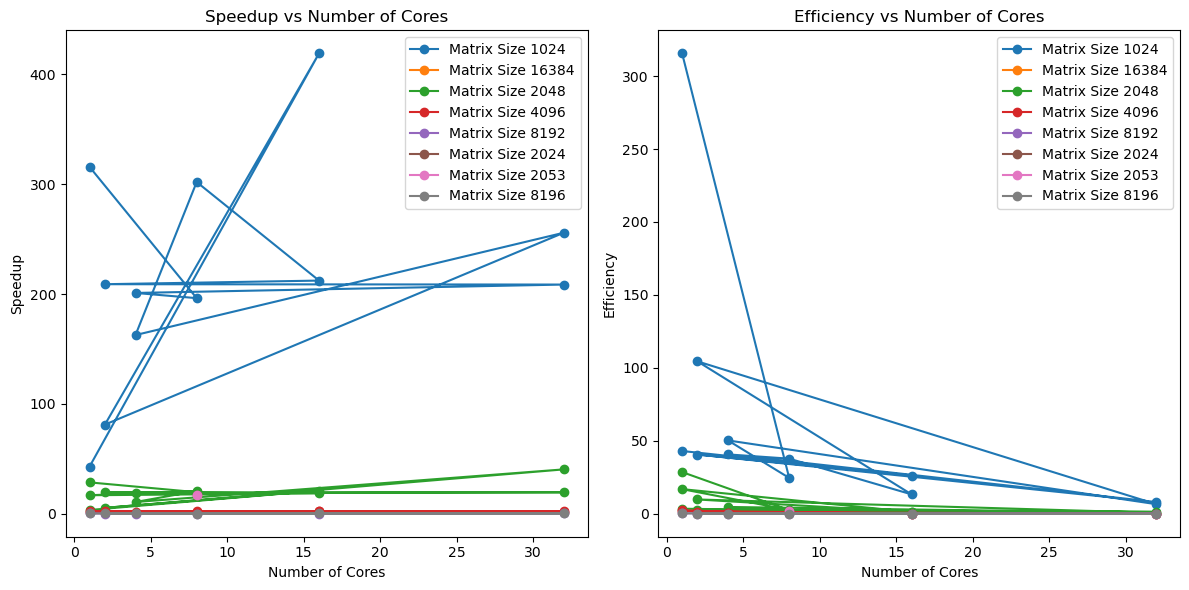

In [6]:
import matplotlib.pyplot as plt

# Calculate speedup and efficiency
serial_time = extracted_data_df.loc[extracted_data_df['Core Number'] == '1', 'Seconds'].mean()

extracted_data_df['Speedup'] = serial_time / extracted_data_df['Seconds']
extracted_data_df['Efficiency'] = extracted_data_df['Speedup'] / extracted_data_df['Core Number'].astype(float)

# Plot speedup and efficiency
plt.figure(figsize=(12, 6))

# Plot speedup
plt.subplot(1, 2, 1)
for matrix_size in extracted_data_df['Matrix Size'].unique():
    subset = extracted_data_df[extracted_data_df['Matrix Size'] == matrix_size]
    plt.plot(subset['Core Number'].astype(int), subset['Speedup'], marker='o', label=f'Matrix Size {matrix_size}')
plt.xlabel('Number of Cores')
plt.ylabel('Speedup')
plt.title('Speedup vs Number of Cores')
plt.legend()

# Plot efficiency
plt.subplot(1, 2, 2)
for matrix_size in extracted_data_df['Matrix Size'].unique():
    subset = extracted_data_df[extracted_data_df['Matrix Size'] == matrix_size]
    plt.plot(subset['Core Number'].astype(int), subset['Efficiency'], marker='o', label=f'Matrix Size {matrix_size}')
plt.xlabel('Number of Cores')
plt.ylabel('Efficiency')
plt.title('Efficiency vs Number of Cores')
plt.legend()

plt.tight_layout()
plt.show()